In [1]:
#Import everything
import os
import sys
import math
import numpy as np
import numpy.linalg
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import fcsparser

import os
import sys
import math
import numpy as np
import numpy.linalg
import pandas as pd

import ternary
from scipy.stats import multinomial

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

import index_haps as idh
import index_flow as idf

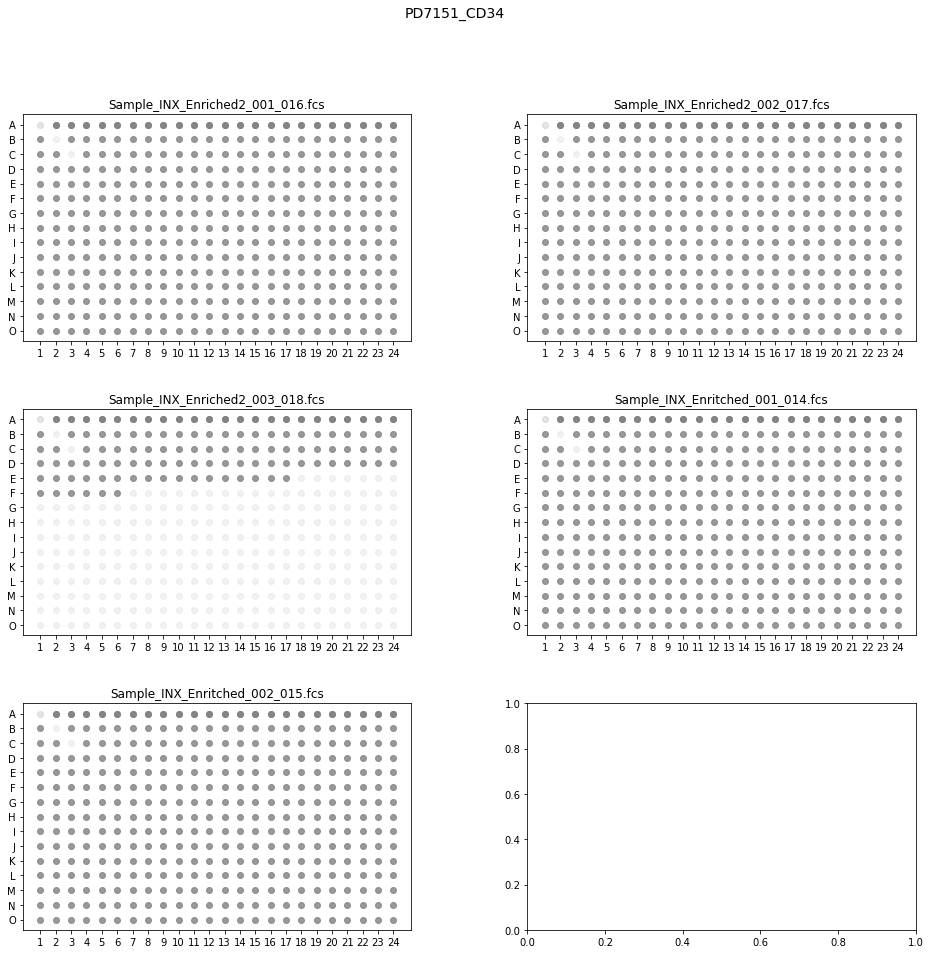

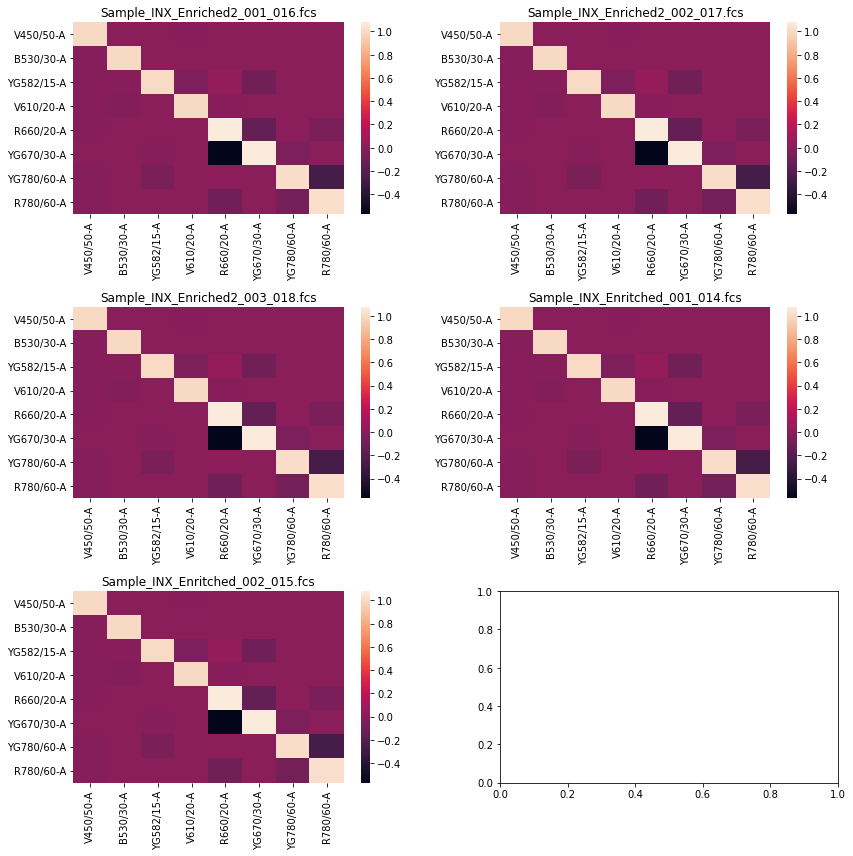

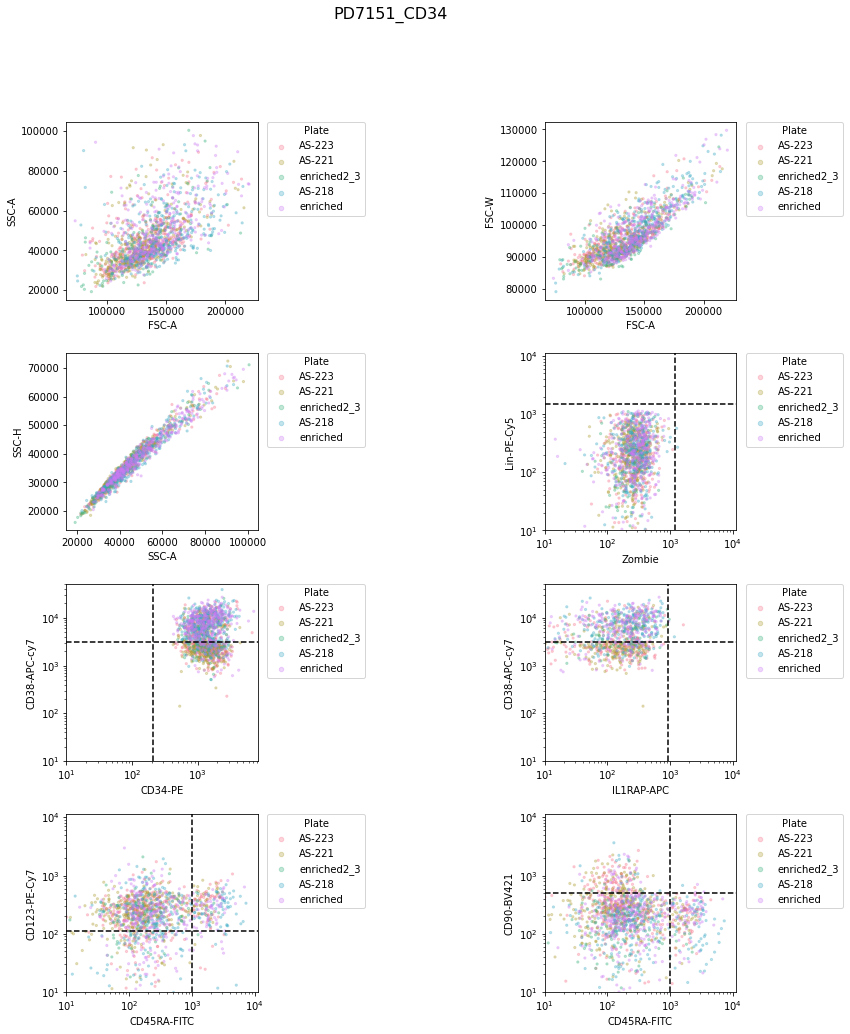

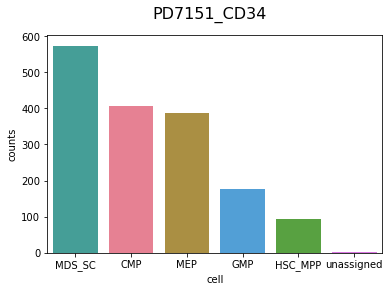

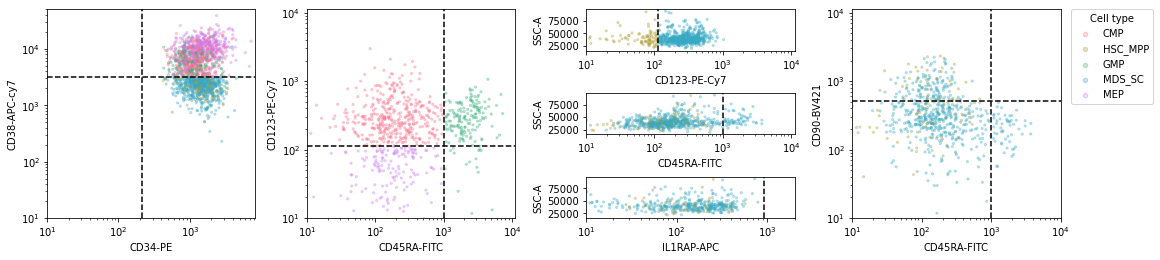

In [2]:
#PD7151 CD34 parameters

directory = '../Data/PD7151_BM/Indexed/'

#Make plate key - note one plate split over 2 index files
files = []
for filename in os.listdir(directory):
    files.append(filename)

plates = ['AS-223', 'AS-221','enriched2_3', 'AS-218', 'enriched'] 

plate_key = dict(zip(files, plates))

channel_key = {'YG582/15-A': 'CD34-PE', 
               'YG670/30-A': 'Lin-PE-Cy5', 
               'YG780/60-A': 'CD123-PE-Cy7', 
               'V450/50-A': 'CD90-BV421', 
               'V610/20-A': 'Zombie', 
               'B530/30-A': 'CD45RA-FITC', 
               'R660/20-A': 'IL1RAP-APC', 
               'R780/60-A': 'CD38-APC-cy7'
}

logs = ['Lin-PE-Cy5', 'CD34-PE','CD38-APC-cy7', 'CD45RA-FITC','CD123-PE-Cy7','Zombie', 'IL1RAP-APC', 'CD90-BV421' ]

plot_list = [
    ['FSC-A', 'SSC-A'],
    ['FSC-A', 'FSC-W'],
    ['SSC-A', 'SSC-H'],
    ['Zombie', 'Lin-PE-Cy5'], 
    ['CD34-PE', 'CD38-APC-cy7'],
    ['IL1RAP-APC', 'CD38-APC-cy7'],
    ['CD45RA-FITC', 'CD123-PE-Cy7'],
    ['CD45RA-FITC', 'CD90-BV421']
]
#Tweak for PD7151
gates = {
    'Lin-PE-Cy5': 1500,
    'CD34-PE': 200 ,
    'CD38-APC-cy7': 3100 ,  #3100 = 10% on Flowjo, 3700 = 15% 
    'CD45RA-FITC': 1000 ,
    'CD123-PE-Cy7': 100,
    'Zombie': 1200,
    'IL1RAP-APC': 900,  #set from FlowJo looking at unstained, not convinced this worked
    'CD90-BV421': 500
}


label = 'PD7151_CD34'
idf.plate_qc(directory, label)
source = idf.get_comp_data(directory, plate_key, channel_key, plot = True)
idf.flowplot_byplate(source, plot_list, logs, gates, label)
CD34assigned = idf.MDS_BM_celltype_assign(source, gates, label, save = False)
idf.flowplot_bycelltype(CD34assigned, plot_list, logs, gates,  label, plot = False, save = False)
idf.flowplot_bycelltype_gating(CD34assigned, logs, gates,  label, plot = True, save = True)

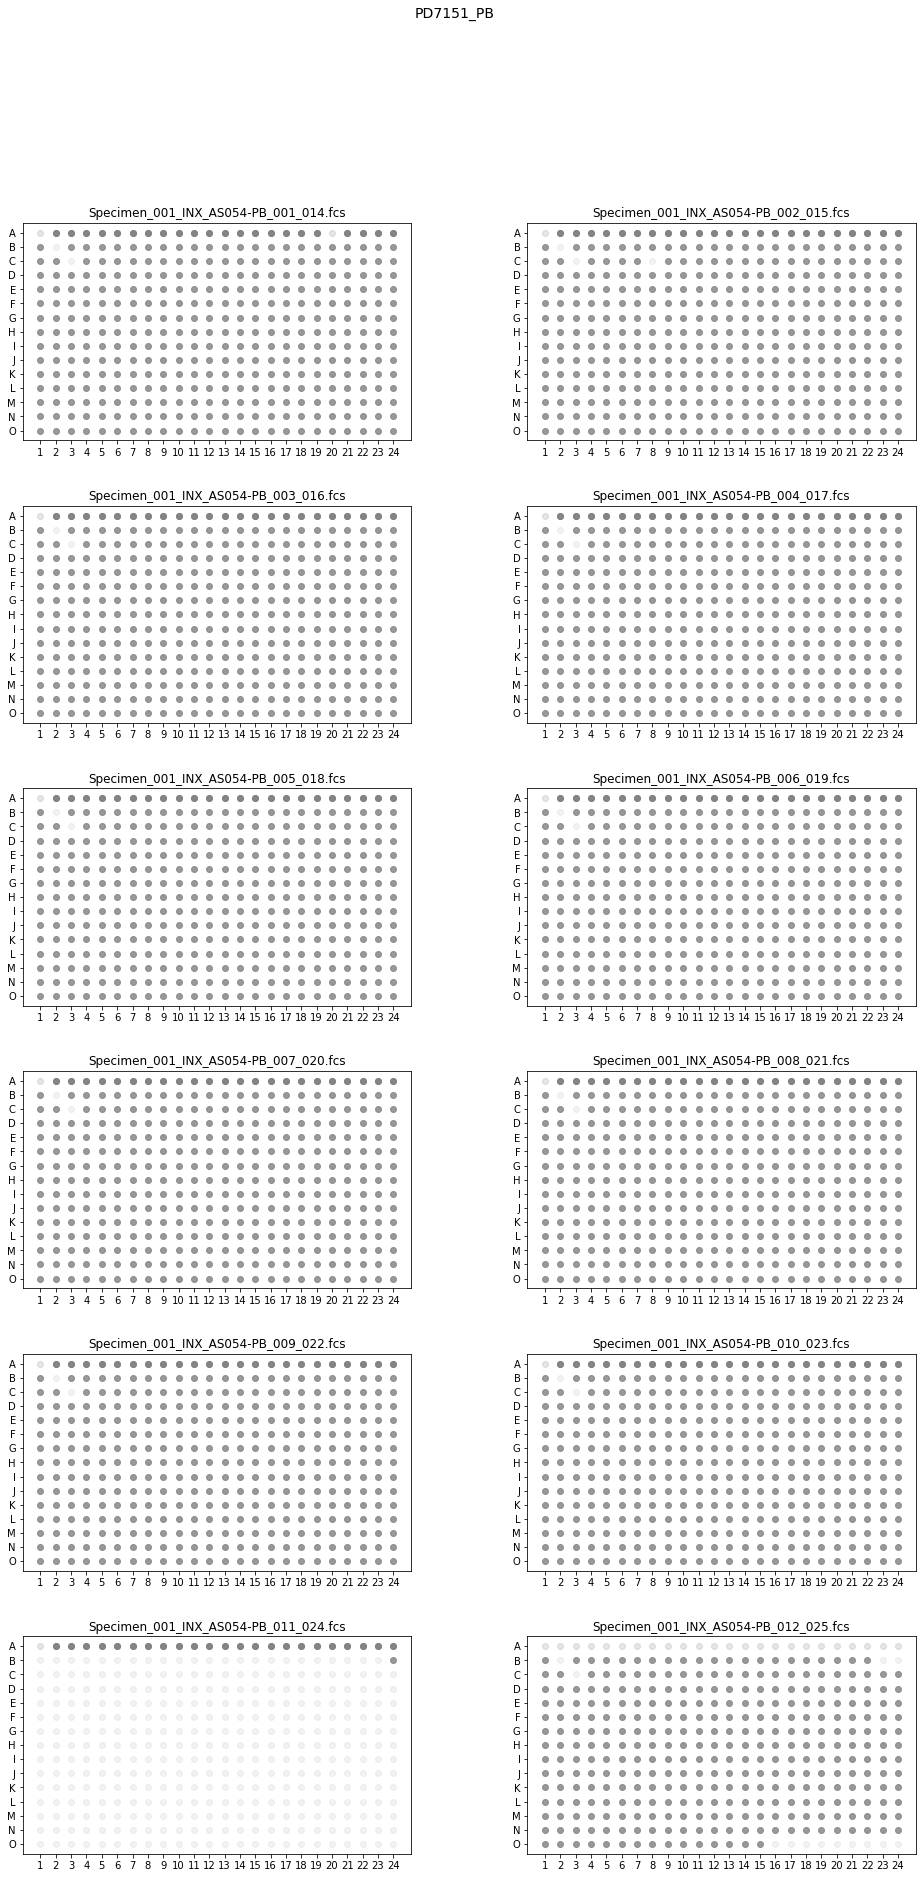

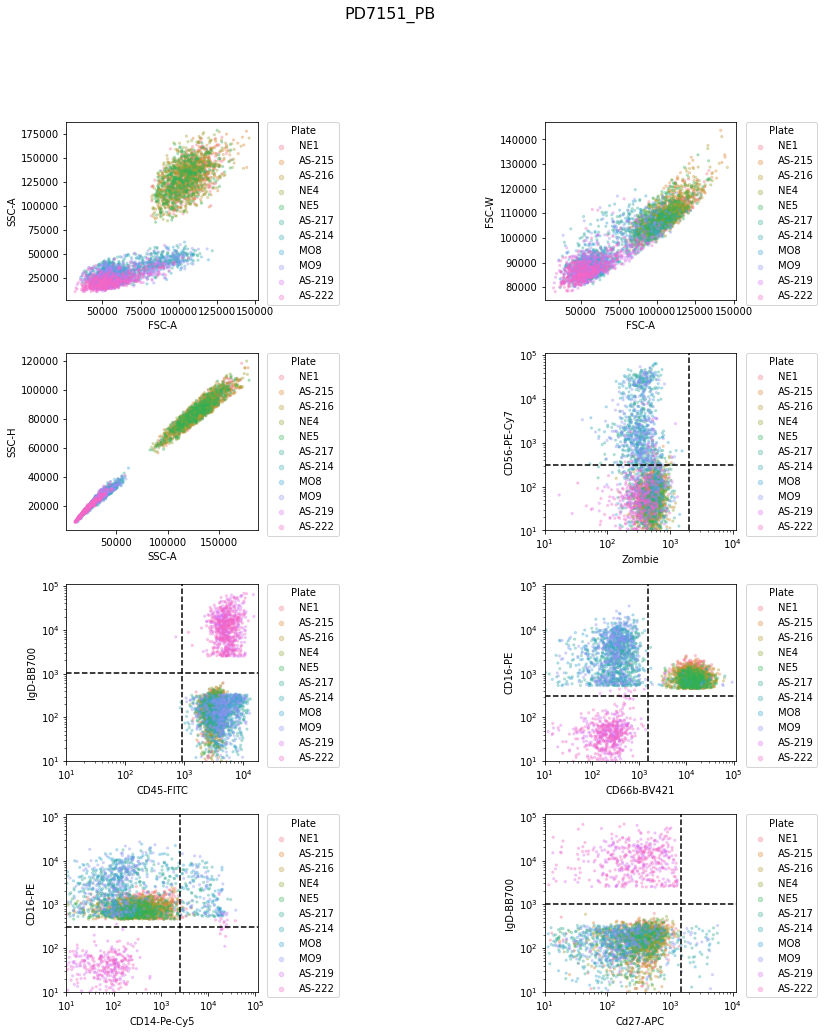

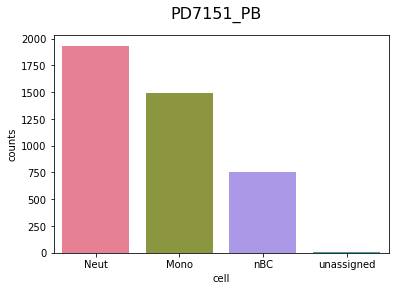

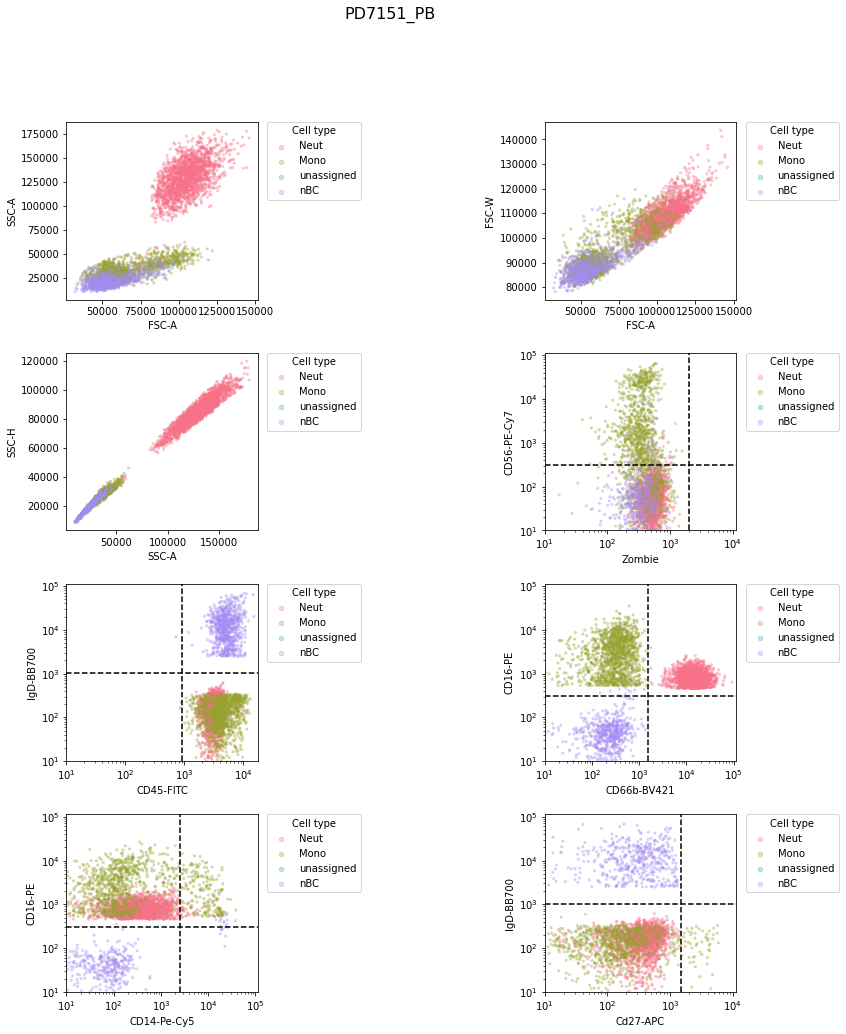

In [3]:
#PD7151 PB parameters

directory = '../Data/PD7151_PB/Indexed/'

#Make plate key - note one plate split over 2 index files
files = []
for filename in os.listdir(directory):
    files.append(filename)
    
plates = ['NE1',
 'AS-215',
 'AS-216',
 'NE4',
 'NE5',
 'AS-217',
 'AS-214',
 'MO8',
 'MO9',
 'AS-219',
 'AS-222a',
 'AS-222']

plate_key = dict(zip(files, plates))

channel_key = {
    'YG582/15-A': 'CD16-PE', 
    'YG670/30-A': 'CD14-Pe-Cy5', 
    'YG780/60-A': 'CD56-PE-Cy7', 
    'V450/50-A': 'CD66b-BV421', 
    'V610/20-A': 'Zombie', 
    'B530/30-A': 'CD45-FITC', 
    'B695/40-A': 'IgD-BB700', 
    'R660/20-A': 'Cd27-APC'
}

logs = ['CD16-PE', 'CD14-Pe-Cy5', 'CD56-PE-Cy7', 'CD66b-BV421', 'Zombie', 'CD45-FITC', 'Cd27-APC', 'R780/60-A', 'IgD-BB700']

plot_list = [
    ['FSC-A', 'SSC-A'],
    ['FSC-A', 'FSC-W'],
    ['SSC-A', 'SSC-H'],
    ['Zombie', 'CD56-PE-Cy7'], 
    ['CD45-FITC', 'IgD-BB700'],
    ['CD66b-BV421', 'CD16-PE'],
    ['CD14-Pe-Cy5', 'CD16-PE'],
    ['Cd27-APC', 'IgD-BB700']
]

gates = {
    'CD16-PE': 300,
    'CD14-Pe-Cy5': 2500 ,
    'CD56-PE-Cy7': 300 ,
    'CD66b-BV421': 1500 ,
    'Zombie': 2000,
    'CD45-FITC': 900,
    'Cd27-APC': 1500,
    'IgD-BB700': 1000,
    'R780/60-A':1000
}


label = 'PD7151_PB'
idf.plate_qc(directory, label)
source = idf.get_comp_data(directory, plate_key, channel_key, plot = False)
#Need to rename placeholder plate AS-222a, and reassign Plate_Well column
source['Plate'] = source['Plate'].replace({'AS-222a':'AS-222'})
source['Plate_Well'] = source['Plate'].astype(str) + '_' + source['Well'].astype(str)

idf.flowplot_byplate(source, plot_list, logs, gates,label)
PBassigned = idf.PB_celltype_assign(source, gates, label, save = False)
idf.flowplot_bycelltype(PBassigned, plot_list, logs, gates,  label, plot = True, save = False)

In [4]:
#Now combine everything into a single df that contains the celltype and flow data for each well
print('Number of CD34 wells (expect 1640) = ', len(CD34assigned))
print('Number of PB wells (expect 4179) = ',len(PBassigned))
PD7151_allcells_assigned = CD34assigned.append(PBassigned, ignore_index=True)
print('Total number of wells = ', len(PD7151_allcells_assigned))

Number of CD34 wells (expect 1640) =  1640
Number of PB wells (expect 4179) =  4179
Total number of wells =  5819


In [5]:
import importlib
importlib.reload(idh)

<module 'index_haps' from 'C:\\Users\\z3283497\\python\\Annatina\\MDS_amplicons\\Code\\index_haps.py'>

PD7151_2
Haplotypes being called on ['PD7151_TET2a', 'PD7151_TET2b']
Cells with 20 reads for 2 genes =  1189
PD7151_2


C:\Users\z3283497\python\Annatina\MDS_amplicons\Code\index_haps.py:488: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(h_pad = 1)


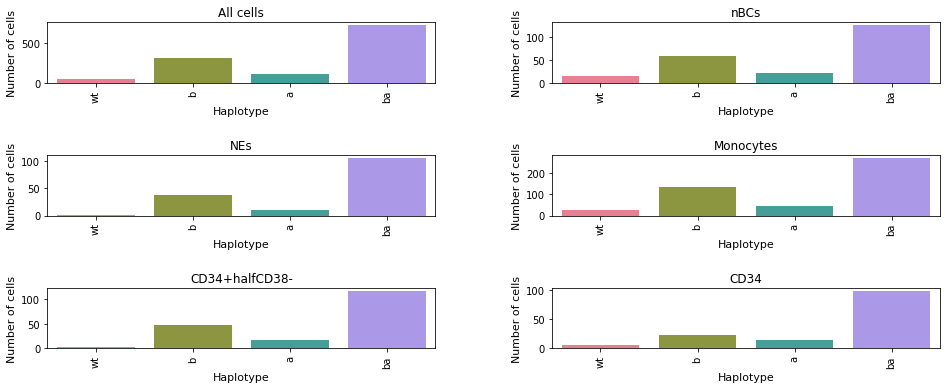

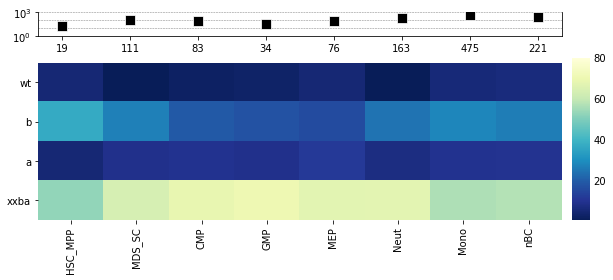

In [6]:
#And assign haplotypes
datafile = '../Data/Amp_data/clean_anon_allele_counts_resc_2.tsv'
metadata = '../Data/Amp_data/Amplicon_metadata_fixed_anon.xlsx'
pt_id = 'PD7151'
haps = 2
reads = 20
cutoff = 0.1
PD7151_plate = idh.data_retrieval2(datafile, metadata, pt_id)
PD7151_haps = idh.call_haps(PD7151_plate, metadata, pt_id, haps, reads, cutoff) #hap number, read cut, proprtion mutated
PD7151_haps_indexed = pd.merge(PD7151_haps, PD7151_allcells_assigned, on = 'Plate_Well')
idh.plot_hap_dist_sort_type(PD7151_haps_indexed, pt_id, haps, reads, cutoff, save = True)
cell_number = idh.plot_index_heatmap_3(PD7151_haps_indexed, pt_id, haps, reads, cutoff, save = True)

In [7]:
#Piecharts for figure 2
#Cell counts permitted haplotypes
cell_number
cc = cell_number.loc[['BA','bA', 'ba']]
cc.insert(2, 'spacer', 'none')
cc

celltype,HSC_MPP,MDS_SC,spacer,CMP,GMP,MEP,Neut,Mono,nBC
Haplotype,,,,,,,,,
BA,1,0,none,2,1,4,1,28,14
bA,7,30,none,16,6,12,40,134,58
ba,10,71,none,57,24,51,110,268,127


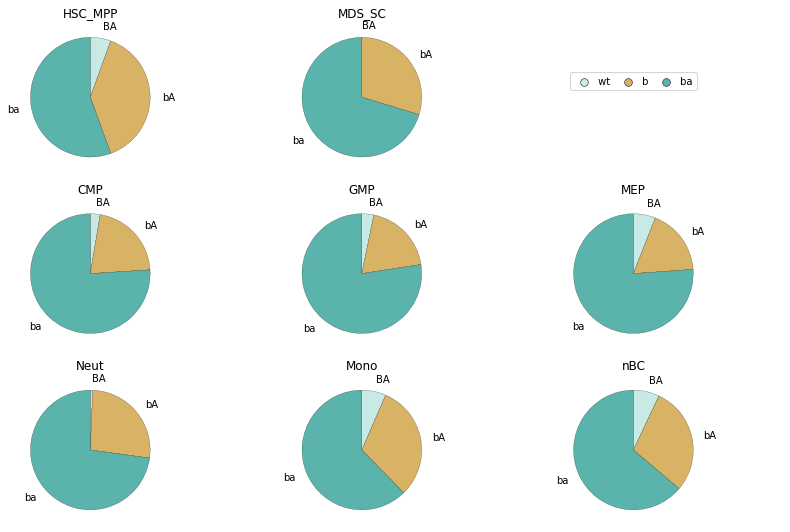

In [8]:
#Create proxy artists for legend
f,a = plt.subplots()
colors = ['#c7eae5', '#d8b365', '#5ab4ac']
lgdlabels = [' wt', ' b', ' ba']
lgdhandles = []
for i, lab in enumerate(lgdlabels):
    line = a.scatter([0], [0], label=lab, color=colors[i], s = 60, edgecolor = 'black', linewidth = 0.5) 
    lgdhandles.append(line)
plt.close(f)

#Plot data
fig, ax = plt.subplots(3, 3, figsize = (12, 7.5))
ax = ax.flatten()

for count, ct in enumerate(cc.columns):
    if count == 2:
        continue
    else:
        labels = cc.index.to_list()
        sizes = cc[ct].to_list()
        wedgeprops={'edgecolor':'black','linewidth': 0.2,  'antialiased': True}
        ax[count].pie(sizes, labels = labels, colors = colors, counterclock=False, startangle = 90, wedgeprops = wedgeprops, labeldistance = 1.2)
        ax[count].set_title(ct)

ax[2].set_axis_off()    
ax[2].legend(handles = lgdhandles, labels = lgdlabels, loc = 'upper center',bbox_to_anchor = [0.5,0.7], ncol = 5, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
fig.tight_layout() 
fig.savefig(f'../Results/{pt_id}_permitted_piecharts.svg',bbox_inches='tight', dpi = 600)
fig.savefig(f'../Results/{pt_id}_permitted_piecharts.png',bbox_inches='tight', dpi = 600)

In [9]:
#Piecharts for figure 2
#Cell counts collapsed to cunts per total number of mutAtions
cc2 = cell_number.copy()

cc2['hap'] = cc2.index.get_level_values(0)

#count the number of lowercase in each haplotype
def n_lower_chars(string):
    return sum(1 for c in string if c.islower())

muts = []
haps = cc2['hap'].to_list()
for h in haps:
    muts.append(n_lower_chars(h))
mut_dict = dict(zip(haps, muts))    

cc2['muts'] = cc2['hap'].replace(mut_dict)
cc2 = cc2.groupby('muts').sum()
cc2.insert(2, 'spacer', 'none')

cc2

celltype,HSC_MPP,MDS_SC,spacer,CMP,GMP,MEP,Neut,Mono,nBC
muts,,,,,,,,,
0,1,0,none,2,1,4,1,28,14
1,8,40,none,24,9,21,52,179,80
2,10,71,none,57,24,51,110,268,127


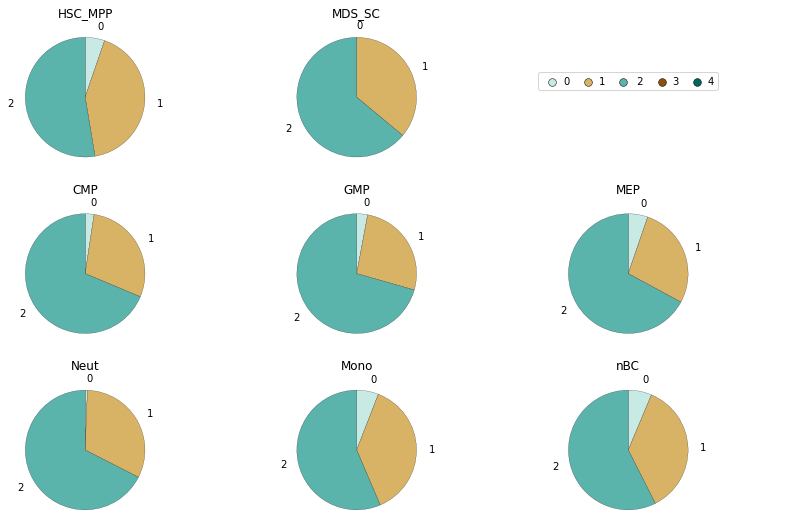

In [10]:
#Create proxy artists for legend
f,a = plt.subplots()
colors = ['#c7eae5', '#d8b365', '#5ab4ac', '#8c510a', '#01665e']
lgdlabels = ['0', '1', ' 2', '3', '4']
lgdhandles = []
for i, lab in enumerate(lgdlabels):
    line = a.scatter([0], [0], label=lab, color=colors[i], s = 60, edgecolor = 'black', linewidth = 0.5) 
    lgdhandles.append(line)
plt.close(f)

#Plot data
fig, ax = plt.subplots(3, 3, figsize = (12, 7.5))
ax = ax.flatten()

for count, ct in enumerate(cc2.columns):
    if count == 2:  #don't try to plot the spacer column
        continue
    else:
        labels = cc2.index.to_list()
        sizes = cc2[ct].to_list()
        wedgeprops={'edgecolor':'black','linewidth': 0.2,  'antialiased': True}
        ax[count].pie(sizes, labels = labels, colors = colors, counterclock=False, startangle = 90, wedgeprops = wedgeprops, labeldistance = 1.2)
        ax[count].set_title(ct)

ax[2].set_axis_off()    
ax[2].legend(handles = lgdhandles, labels = lgdlabels, loc = 'upper center',bbox_to_anchor = [0.5,0.7], ncol = 5, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)

fig.tight_layout() 
fig.savefig(f'../Results/{pt_id}_mutno_piecharts.svg',bbox_inches='tight', dpi = 600)
fig.savefig(f'../Results/{pt_id}_mutno_piecharts.png',bbox_inches='tight', dpi = 600)


In [16]:
#Proportion of total cells which are wt
cc3 = cc2.copy()
cc3 = cc3.drop(columns = 'spacer')

In [17]:
#All cells sampled
wt = int(cc3.loc[:0].sum(axis = 1))
allcells = cc3.to_numpy().sum()
prop = wt / allcells
print('The total proportion of wt cells is ', prop)
print('The total number of cells with indx and haplotype data is ', allcells)

The total proportion of wt cells is  0.04314720812182741
The total number of cells with indx and haplotype data is  1182


In [18]:
#Stem cells
cc4 = cc3[['HSC_MPP', 'MDS_SC']]
wt = int(cc4.loc[:0].sum(axis = 1))
allcells = cc4.to_numpy().sum()
prop = wt / allcells
print('The total proportion of wt stem cells is ', prop)
print('The total number of stem cells with indx and haplotype data is ', allcells)

The total proportion of wt stem cells is  0.007692307692307693
The total number of stem cells with indx and haplotype data is  130


In [19]:
#HSCs
cc5 = cc3[['HSC_MPP']]
wt = int(cc5.loc[:0].sum(axis = 1))
allcells = cc5.to_numpy().sum()
prop = wt / allcells
print('The total proportion of wt HSCs is ', prop)
print('The total number of HSCs with indx and haplotype data is ', allcells)

The total proportion of wt HSCs is  0.05263157894736842
The total number of HSCs with indx and haplotype data is  19


In [20]:
#Mature myeloid cells
cc6 = cc3[['Neut', 'Mono']]
wt = int(cc6.loc[:0].sum(axis = 1))
allcells = cc6.to_numpy().sum()
prop = wt / allcells
print('The total proportion of wt mature myeloid cells is ', prop)
print('The total number of mature myeloid cells with indx and haplotype data is ', allcells)

The total proportion of wt mature myeloid cells is  0.045454545454545456
The total number of mature myeloid cells with indx and haplotype data is  638
